In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
uvvis_data = pd.read_excel("../uvvis/validations.xlsx", engine='openpyxl')
water = uvvis_data.iloc[:,-1].to_numpy()
wavelength = uvvis_data["Wavelength"].to_numpy()
well_names = uvvis_data.columns[1:-1].to_numpy()
print(well_names)

['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11' 'A12' 'B1' 'B2'
 'B3' 'B4' 'B5' 'B6' 'B7' 'B8' 'B9' 'B10' 'B11' 'B12' 'C1' 'C2' 'C3' 'C4'
 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12']


### Inspect Line Sample Spectra

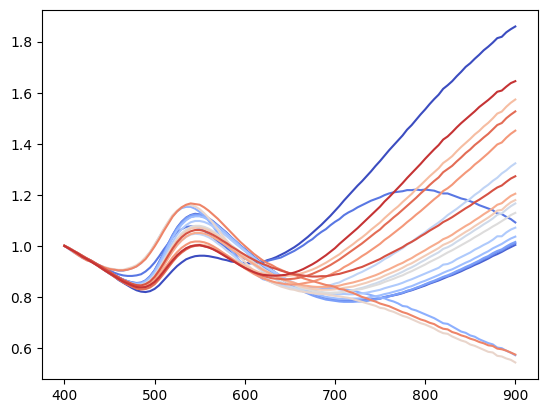

In [3]:
from matplotlib.colors import Normalize

linesample_uvvis = uvvis_data.iloc[:,17:-1]
linesample_well_names = linesample_uvvis.columns.to_numpy()
cmap = plt.get_cmap("coolwarm")
norm = Normalize(vmin=0, vmax = len(linesample_well_names))
for i, well_name in enumerate(linesample_well_names):
    y = linesample_uvvis[well_name].values-water
    y_norm = y/y[0]
    plt.plot(wavelength, 
             y_norm,
             color=cmap(norm(i))
             )
plt.show()

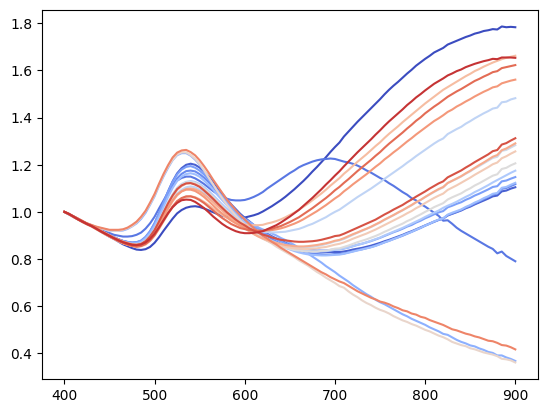

In [7]:
uvvis_validations_redisperse = pd.read_excel("../uvvis/validations_redisperse.xlsx", engine='openpyxl')
for i, well_name in enumerate(linesample_well_names):
    y = uvvis_validations_redisperse[well_name].values-water
    y_norm = y/y[0]
    plt.plot(wavelength, 
             y_norm,
             color=cmap(norm(i))
             )
plt.show()

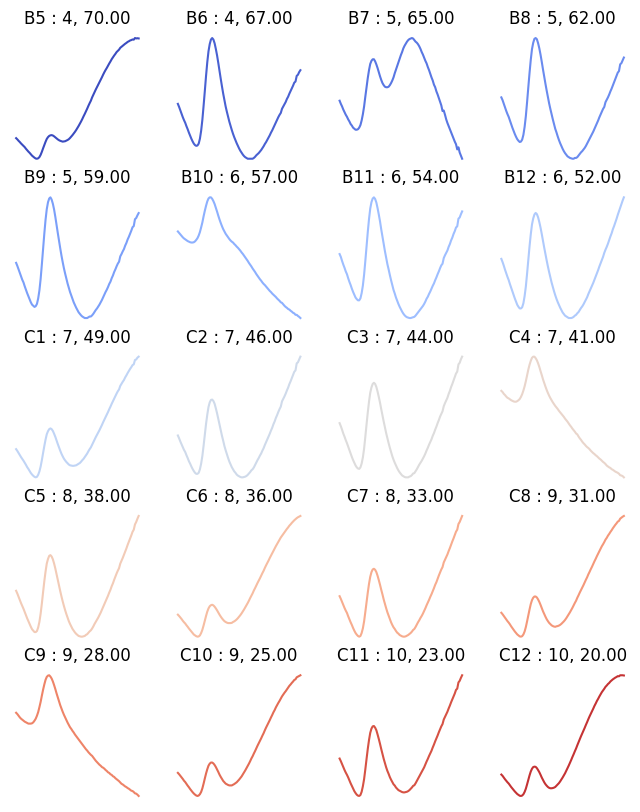

In [16]:
times = pd.read_csv("../line_sample_validation/times_line_samples.csv")
volumes = pd.read_csv("../line_sample_validation/volumes_line_samples.csv")

fig, axs = plt.subplots(5,4, figsize=(4*2, 5*2))
axs = axs.flatten()
for i, well_name in enumerate(linesample_well_names):
    y = uvvis_validations_redisperse[well_name].values-water
    axs[i].plot(wavelength, y, color=cmap(norm(i)))
    axs[i].set_title("%s : %d, %.2f"%(well_name, 
                                      times.iloc[i,-1], 
                                      volumes.iloc[i,-1]))
    axs[i].axis("off")
plt.show()

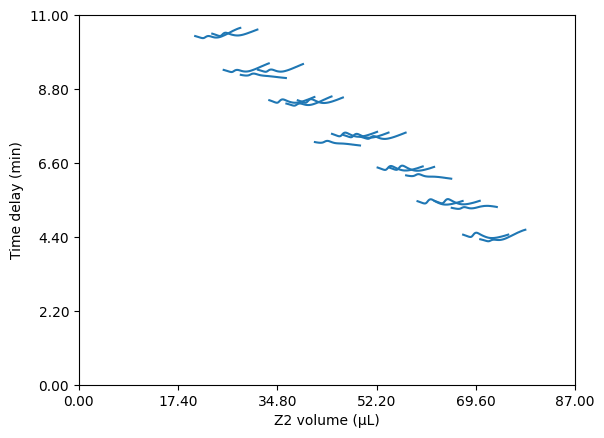

In [18]:
import sys 
sys.path.append("/Users/pozzolabadmin/Documents/codebase/experiments/peptide_phase_mapping")
from utils import plot_phasemap

line_spectra_measured = []
for well_name in linesample_well_names:
    y = linesample_uvvis[well_name].values-water
    line_spectra_measured.append(y)

line_spectra_measured = np.asarray(line_spectra_measured)
linesample_volumes = pd.read_csv("../line_sample_validation/volumes_line_samples.csv")
linesample_times = pd.read_csv("../line_sample_validation/times_line_samples.csv")
bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T
fig, ax = plt.subplots()
comps = np.vstack((linesample_volumes['Z2'].values, linesample_times['DT4'].values)).T
plot_phasemap(bounds, ax, comps, line_spectra_measured, limits=[0,1.9])
ax.set_xlabel('Z2 volume (µL)')
ax.set_ylabel('Time delay (min)') 
plt.show()


In [19]:
np.savez("../line_sample_validation/uvvis.npz", 
         spectra=line_spectra_measured,
         wavelength = wavelength,
         )

## Inspect Retrosynthesis UV-Vis

In [24]:
retrosynthesis_uvvis = uvvis_data.iloc[:,1:17]
retrosynthesis_well_names = retrosynthesis_uvvis.columns.to_numpy()

In [28]:
retrosynthesis_spectra_measured = []
for well_name in retrosynthesis_well_names:
    y = retrosynthesis_uvvis[well_name].values-water
    retrosynthesis_spectra_measured.append(y)

retrosynthesis_spectra_measured = np.asarray(retrosynthesis_spectra_measured)

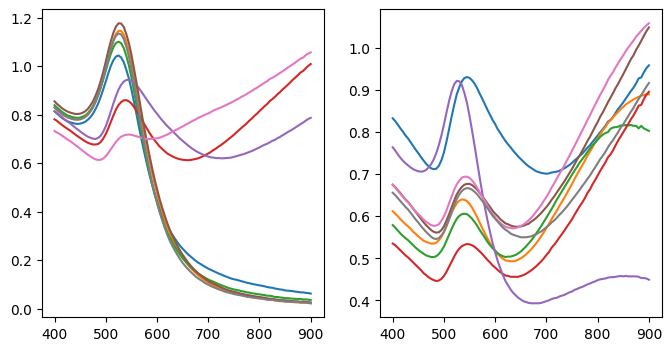

In [29]:
fig, axs = plt.subplots(1,2, figsize=(2*4, 4))

for i in range(8):
    axs[0].plot(wavelength, 
                retrosynthesis_spectra_measured[i,:]
                )

for i in range(8,16):
    axs[1].plot(wavelength, 
            retrosynthesis_spectra_measured[i,:]
            )
plt.show()

In [33]:
np.savez("../retrosynth/sphere_measured.npz", 
         spectra=retrosynthesis_spectra_measured[:8,:], 
         wav = wavelength
         )
np.savez("../retrosynth/triangle_measured.npz", 
         spectra=retrosynthesis_spectra_measured[8:,:], 
         wav = wavelength
         )